# PREDICTING THE SALES VALUE

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing dataset as data frame
df =  pd.read_csv('Advertising (1).csv', index_col=0,header=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 4)

In [4]:
#checking for missing values
print(df.info())
print()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB
None

TV           0
radio        0
newspaper    0
sales        0
dtype: int64


In [5]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [6]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


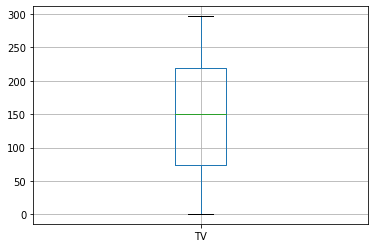

In [7]:
df.boxplot(column='TV')

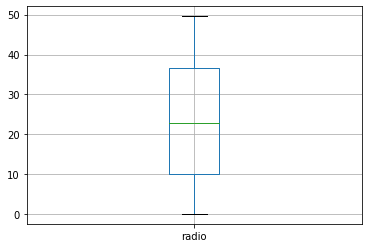

In [8]:
df.boxplot(column='radio')

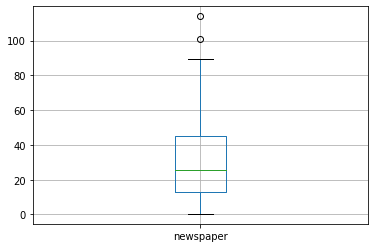

In [9]:
df.boxplot(column='newspaper')

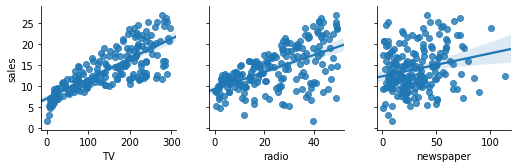

In [10]:
#Assumption of linearity
#Every independent variable should have a linear relationship 
# with the dependent variable

sns.pairplot(df,x_vars = ['TV','radio','newspaper'],
                y_vars = 'sales',
                kind = 'reg')

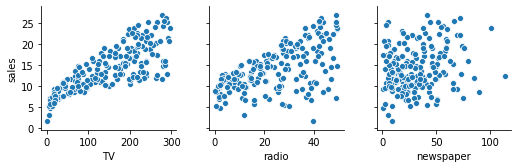

In [11]:
sns.pairplot(df,x_vars = ['TV','radio','newspaper'],
                y_vars = 'sales',
                kind = 'scatter')

In [12]:
#creating X and Y
#where X with those variables which satisfy the assumption of linearity
X = df[['TV','radio','newspaper']]
Y = df['sales']

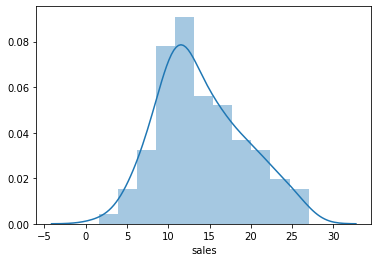

In [13]:
#Assumption of normality
#The dependent variable should be approximately normally distributed
sns.distplot(Y,hist = True)

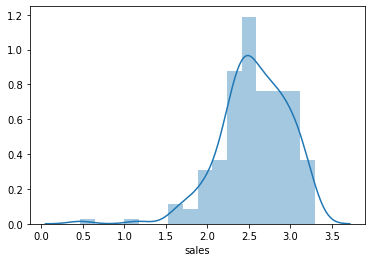

In [14]:
# Log transformation(Natural log)
# not needed as the graph gets left/Negative skewed
Y_log = np.log(Y)

sns.distplot(Y_log,hist = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002055F792108>,
      dtype=object)

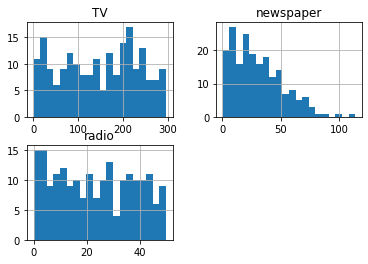

In [15]:
X.hist(bins=20)

In [16]:
#Execute this blog only once

#Finding skewness of each variables

from scipy.stats import skew

#calculating skewness after droping missing values
data_num_skew = X.apply(lambda x: skew(x.dropna()))

#checking for variables exceeding the maximum positively and negatively skewness
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]

print(data_num_skew)
print()
print(data_num_skewed)

# apply log + 1 transformation for all numeric features with skewness over .75
X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])

TV          -0.069328
radio        0.093467
newspaper    0.887996
dtype: float64

newspaper    0.887996
dtype: float64


E:\ANACONDAP\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


                 TV     radio  newspaper
TV         1.000000  0.054809   0.030951
radio      0.054809  1.000000   0.251909
newspaper  0.030951  0.251909   1.000000



(3.0, 0.0)

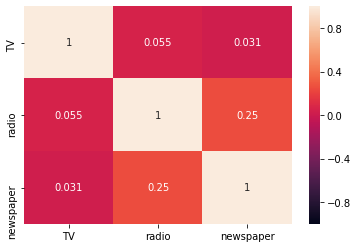

In [17]:
#Assumption of multi-collinearity

corr_df = X.corr(method = 'pearson')
print(corr_df)
print()


a = sns.heatmap(corr_df,vmax = 1.0, vmin = -1.0, annot = True)
b, t = a.get_ylim()
a.set_ylim(b+0.5, t-0.5)

In [18]:
#calculating vif
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)

,features,VIF Factor
0,TV,3.39
1,radio,3.63
2,newspaper,5.44


In [19]:
#splitting data into training and testing

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,
                                                        random_state = 10)

In [20]:
print(Y_train)

191    10.8
8      13.2
27     15.0
139     9.6
59     23.8
       ... 
114    15.9
65     18.0
16     22.4
126    10.6
10     10.6
Name: sales, Length: 160, dtype: float64


In [21]:
from sklearn.linear_model import LinearRegression 

In [22]:
#create a model object
lm = LinearRegression()

#train the model object
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
#print the intercepts and coefficients
print(lm.intercept_)
print()
print(lm.coef_)

3.353291385815158

[ 0.0437425   0.19303708 -0.04895137]


In [24]:
#pair the feature names with the coefficients
print(list(zip(X.columns,lm.coef_)))

[('TV', 0.04374250157742163), ('radio', 0.19303707897345293), ('newspaper', -0.04895136822248809)]


In [25]:
x1 = 100
x2 = 100
x3 = 100
ypred = lm.intercept_ + (x1*lm.coef_[0]) + (x2*lm.coef_[1]) + (x3*lm.coef_[2])

print(ypred)

22.136112618653804


In [26]:
#predictting using the model
Y_pred = lm.predict(X_test)
print(Y_pred)

[18.15026866 12.96136899 18.05815332 23.66025079 20.68751041 14.26325872
 14.92774472 21.38847375 21.14752911 12.75788534 23.99735583  7.20632737
 12.30777109 19.22813333 19.41581583 13.44985803 19.62619644  9.24667496
 21.1052867  20.87838433 15.52611251 10.91695579 22.82910679 15.82915597
 17.40742204  8.17170435 11.88738387 12.69866637 21.71275044  7.94920205
 12.49118989 20.43292079  4.71443086  4.72126238 16.7504848  15.74384945
  6.74775596 17.73750244  9.01170001 13.60841593]


In [27]:
ndf = pd.DataFrame()
ndf = X_test

ndf['Actual Sales'] = Y_test
ndf['Predicted Sales'] = Y_pred
ndf

E:\ANACONDAP\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
E:\ANACONDAP\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,TV,radio,newspaper,Actual Sales,Predicted Sales
60,210.7,29.5,2.332144,18.4,18.150269
6,8.7,48.9,4.330733,7.2,12.961369
21,218.4,27.7,3.996364,18.0,18.058153
199,283.6,42.0,4.207673,25.5,23.660251
53,216.4,41.7,3.703768,22.6,20.687510
20,147.3,23.9,3.000720,14.6,14.263259
163,188.4,18.1,3.280911,14.9,14.927745
56,198.9,49.4,4.110874,23.7,21.388474
70,216.8,43.9,3.339322,22.3,21.147529
3,17.2,45.9,4.252772,9.3,12.757885


In [28]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)


0.8348010719035319
2.592976911093061
0.8322725168816472


In [29]:
print(min(Y_test))
print(max(Y_test))

1.6
25.5


In [30]:
ndf["Deviation"]=ndf["Actual Sales"]-ndf["Predicted Sales"]
ndf.to_excel("Sales Prediction.xlsx",header=True,index=True)
ndf.head()

E:\ANACONDAP\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,TV,radio,newspaper,Actual Sales,Predicted Sales,Deviation
60,210.7,29.5,2.332144,18.4,18.150269,0.249731
6,8.7,48.9,4.330733,7.2,12.961369,-5.761369
21,218.4,27.7,3.996364,18.0,18.058153,-0.058153
199,283.6,42.0,4.207673,25.5,23.660251,1.839749
53,216.4,41.7,3.703768,22.6,20.687510,1.912490


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,
                                                        random_state = 10)

In [32]:
from sklearn.linear_model import Ridge
#create a model object
lm = Ridge()

#train the model object
lm.fit(X_train,Y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [33]:
print(lm.intercept_)
print(lm.coef_)

3.3522471725965985
[ 0.04374234  0.19302603 -0.04853131]


In [34]:
Y_pred=lm.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)


"""
Previous values:
0.834801071903532
2.59297691109306
0.8322725168816474
"""

0.8348082644975935
2.5929204626839977
0.8322798195664342


'\nPrevious values:\n0.834801071903532\n2.59297691109306\n0.8322725168816474\n'

In [35]:
#linear regression is faster compared to redge 
#use ridge when there is a difference between r square and adjusted r square
#ridge is computationally expensive and consumes more time

In [36]:
from sklearn.linear_model import Lasso
#create a model object
lm = Lasso()

#train the model object
lm.fit(X_train,Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [37]:
print(lm.intercept_)
print(lm.coef_)

3.336794058220317
[ 0.04362374  0.18766033 -0.        ]


In [38]:
#newspaper is insignificant variable therefore lasso forcefully makes is zero

In [39]:
Y_pred=lm.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)


"""
Previous values:
0.834801071903532
2.59297691109306
0.8322725168816474
"""

0.8360506658527163
2.5831514271094234
0.8335412372688292


'\nPrevious values:\n0.834801071903532\n2.59297691109306\n0.8322725168816474\n'

In [40]:
#lasso is a better model as compared from linear regression nad ridge regression because of the error was low

In [41]:
#fit(X_train, Y_train)-->sklearn
#Y~X1+X2+X3,data=df-->statsmodels

In [42]:
new_df=pd.DataFrame()
new_df=X_train
new_df["sales"]=Y_train
new_df.shape


E:\ANACONDAP\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(160, 4)

In [43]:
import statsmodels.formula.api as sm

# create a fitted model with all three features
lm_model = sm.ols(formula='sales ~ TV + radio + newspaper', data=new_df).fit()

# print the coefficients
print(lm_model.params)
print(lm_model.summary())

Intercept    3.353291
TV           0.043743
radio        0.193037
newspaper   -0.048951
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     605.4
Date:                Tue, 09 Jun 2020   Prob (F-statistic):           1.10e-85
Time:                        10:13:42   Log-Likelihood:                -276.63
No. Observations:                 160   AIC:                             561.3
Df Residuals:                     156   BIC:                             573.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [44]:
#when data does not changes use rmse when data changes and the algo remain the same use aic for comparision lower rmse and lower aic the better is the model

In [45]:
"""H0-->Null Hypothesis
opp of alternate hypothesis

H1-->Alternate hypothesis
Stmt which you want to be proved as True


H0-->There is no significant relationship between X and Y

H1-->There is a significant relationship between X and Y

p-value<0.05
If pvalue is low, the null must go
If pvalue is high, the null must fly


Confidence Interval-->95%
"""

'H0-->Null Hypothesis\nopp of alternate hypothesis\n\nH1-->Alternate hypothesis\nStmt which you want to be proved as True\n\n\nH0-->There is no significant relationship between X and Y\n\nH1-->There is a significant relationship between X and Y\n\np-value<0.05\nIf pvalue is low, the null must go\nIf pvalue is high, the null must fly\n\n\nConfidence Interval-->95%\n'

In [46]:
Y_pred_new=lm_model.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred_new)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8348010719035377
2.5929769110930154
0.832272516881653


In [47]:
import statsmodels.formula.api as sm

# create a fitted model with all three features
Nlm_model = sm.ols(formula='sales ~ TV + radio', data=new_df).fit()

# print the coefficients
print(Nlm_model.params)
print(Nlm_model.summary())

Intercept    3.217026
TV           0.043721
radio        0.192425
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     912.9
Date:                Tue, 09 Jun 2020   Prob (F-statistic):           3.47e-87
Time:                        10:13:42   Log-Likelihood:                -276.70
No. Observations:                 160   AIC:                             559.4
Df Residuals:                     157   BIC:                             568.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [48]:
#DURBIN WATSON IS USED TO CHECK AUTO CORRELATION.
#VALUE LIES BETWEEN 0 TO 4
#value close to 2 there is no auto correlation
#value close to 4 there is negative auto correlation
#value close to 0 there is positive auto correlation

In [49]:
Y_pred_new=Nlm_model.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred_new)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8354496662944217
2.58788170773781
0.8329310387377037


Text(0, 0.5, 'Residuals')

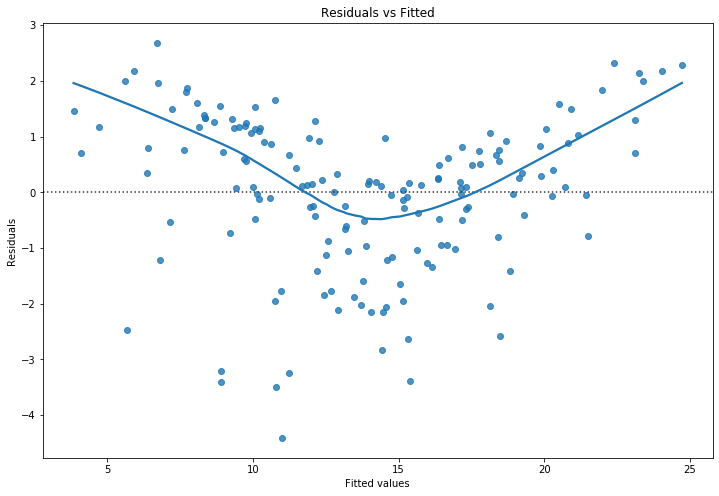

In [50]:
import matplotlib.pyplot as plt
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

# fitted values (need a constant term for intercept)
model_fitted_y = lm_model.fittedvalues

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'sales', data=new_df, lowess=True)

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

In [51]:
#ERROR SHOULD BE RANDOM CAN BE CHECKED USING RESIDUAL VS FITTED PLOT
#any random line will be ok but no cyclic patern should be there in the graph

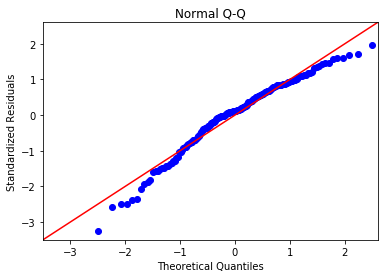

In [52]:
res = lm_model.resid
import statsmodels.api as stm
import scipy.stats as stats
fig = stm.qqplot(res, fit=True, line='45')
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.show()

In [53]:
#Error shouls follow normal distribution can be checked using normal qq plot quantile quantile plot
#The scatter point should red diagonal which indicated normal distribution

Text(0, 0.5, '$\\sqrt{|Standardized Residuals|}$')

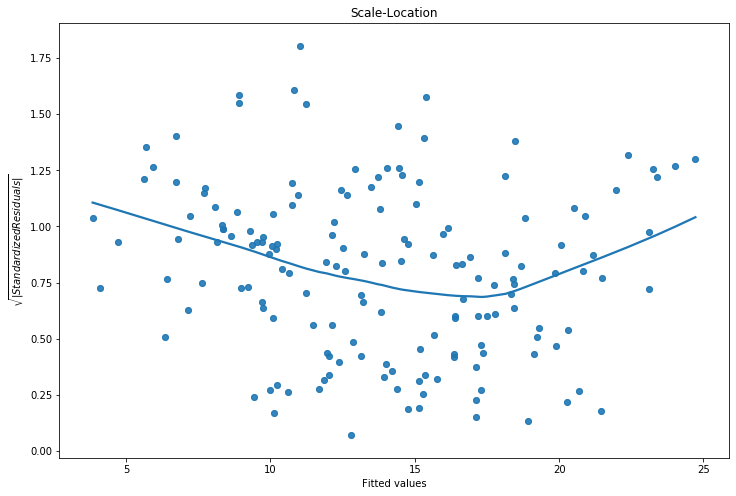

In [54]:
# normalized residuals
model_norm_residuals = lm_model.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, lowess=True)


plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')

In [55]:
#error should follow a constsnt variance aslo known as assumption of homoscedasticity can be checked using scale location plot 

In [59]:
#scaler is only applied on X variables not on y variable
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)
#X=scaler.fit(X)
#X=scaler.transform(X)

In [62]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
random_state=10)

In [81]:

from sklearn.linear_model import SGDRegressor
lm = SGDRegressor(learning_rate="constant",eta0=0.0001,random_state=10,max_iter=50000)
lm.fit(X_train,Y_train)

# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)
"""
previous values:
3.353291385815151
[ 0.0437425 0.19303708 -0.04895137]
"""


[13.91433016]
[3.6664071  2.74683794 0.0047108 ]


'\nprevious values:\n3.353291385815151\n[ 0.0437425 0.19303708 -0.04895137]\n'

In [82]:
Y_pred_new=lm.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred_new)
print(r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print(rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8368267654094411
2.5770301431510645
0.834329215900402
